In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy import ndimage

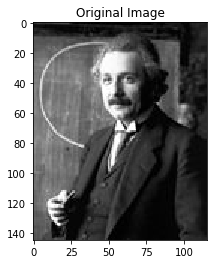

In [2]:
image = mpimg.imread('Einstein.jpg')

plt.title('Original Image')
plt.imshow(image, cmap='gray')

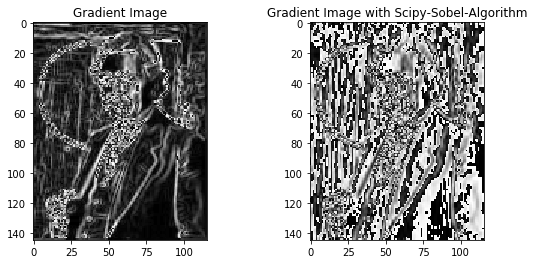

In [3]:
sx = np.array(([1, 0, -1],
               [2, 0, -2], 
               [1, 0, -1]))

sy = np.array(([1,   2,  1],
               [0,   0,  0], 
               [-1, -2, -1]))

imgD = np.copy(image)

for i in range(1, image.shape[0] - 1):
    for j in range(1, image.shape[1] - 1):
        n = np.array(([image[i + 1][j - 1], image[i + 1][j], image[i + 1][j + 1]],
                      [image[i][j - 1]    , image[i][j]    , image[i][j + 1]], 
                      [image[i - 1][j - 1], image[i - 1][j], image[i - 1][j + 1]]))

        gx = np.multiply(sx, n)
        gy = np.multiply(sy, n)

        sumX = gx.sum()
        sumY = gy.sum()
        
        g = np.sqrt(np.power(sumX, 2) + np.power(sumY, 2))
        
        imgD[i][j] = g
        

sobelAlg = ndimage.sobel(image)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(right=1.3)

ax1.set_title('Gradient Image')
ax1.imshow(imgD, cmap='gray')

ax2.set_title('Gradient Image with Scipy-Sobel-Algorithm')
ax2.imshow(sobelAlg, cmap='gray')

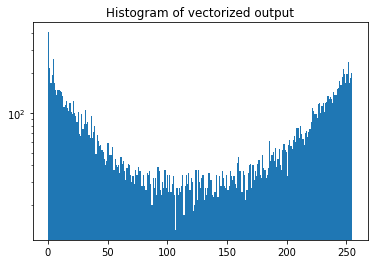

In [15]:
vecOut = sobelAlg.flatten()
plt.title('Histogram of vectorized output')
hist = plt.hist(vecOut.ravel(), bins=256, log=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in ubyte_scalars
  after removing the cwd from sys.path.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()


True


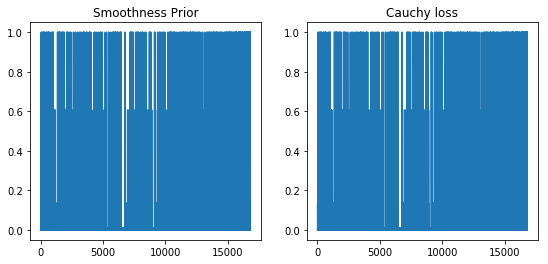

In [16]:
s = []
for i in range(len(vecOut)):
    if i < len(vecOut) - 1:
        s.append(np.exp(-0.5 * np.power(vecOut[i] - vecOut[i + 1], 2)))
    else:
        s.append(np.exp(-0.5 * np.power(vecOut[i] - vecOut[i], 2)))

cauchy = []
for i in range(len(vecOut)):
    if i < len(vecOut) - 1:
        cauchy.append(np.exp(-0.5 * np.power(vecOut[i] - vecOut[i + 1], 2)))
    else:
        cauchy.append(np.exp(-0.5 * np.log(1 + 0.5 * np.power(vecOut[i] - vecOut[i], 2))))
        
print(np.array_equal(s, cauchy))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(right=1.3)

ax1.set_title('Smoothness Prior')
ax1.plot(s)

ax2.set_title('Cauchy loss')
ax2.plot(cauchy)
